# Contributors

Roger Vieira 

Linkedin: [Linkedin](https://www.linkedin.com/in/rogerfloresvieira/)

Github: [Github](https://github.com/rogerfvieira)

Email: rogerfloresvieira@icloud.com


Bradley Baker 

Linkedin: [Linkedin](https://www.linkedin.com/in/bradley-baker22/)

Github: [Github](https://github.com/bradwbaker) 

Email: bradleybaker@email.arizona.edu

# Goal

The purpose of this notebook is to perform data analysis on a list of responses from mentee's, and to then use said data to determine the top n(an arbitrarily large set of responses) most relevant topics. The data may then be used by mentors and developers working directly with the code to determine what the top needs of mentees are and as a result the general direction of the underdogs platform should go. 

# Imports

In [5]:
import pandas as pd 
import numpy as np
import spacy
import altair as alt
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud 

# Load CSV dataset into pandas dataframe

In [6]:
df = pd.read_csv('responses.csv')

# I. Exploratory Data Analysis

In [7]:
df

,What are you hoping to gain from the community?,What are you hoping to gain from the community - SUMMARY,How did you hear about Underdog Devs,Unnamed: 3
0,Get a mentor that will lead to job.,Job Search Help,NaN,Job Search Help
1,to be a great problem solver,Pair Programming/ Coding Practice,NaN,Tech Industry Coaching
2,I want to take the essential advantage of gain...,Pair Programming/ Coding Practice,NaN,Pair Programming/ Coding Practice
3,"I want to learn more, develop my skills and be...","Tech Industry Coaching, Pair Programming/ Codi...",NaN,NaN
4,Become a better developer and help others in r...,Pair Programming/ Coding Practice,NaN,NaN
...,...,...,...,...
331,Networking opportunities,NaN,NaN,NaN
332,Advice/guidance on how to obtain a tech career...,NaN,NaN,NaN
333,"Community, someone who wants to build things t...",NaN,NaN,NaN
334,A community of people a place I can ask questi...,NaN,NaN,NaN


### Todo list:

1. Data Wrangling/Cleaning
2. Tokenize text
3. Case normalize
4. Remove punctuation
5. Lemmatize text 
6. Stopword removal 
7. Display Word Count





# II. Data Wrangling/Cleaning

In [8]:
# rename useful columns for clarity
df.rename(columns = {'What are you hoping to gain from the community?':'applicant_responses', 
                     'What are you hoping to gain from the community - SUMMARY':'summary'}, inplace = True)

# get rid of columns not being used for EDA and Analysis
df.drop(labels=['How did you hear about Underdog Devs', 'Unnamed: 3'], axis=1, inplace = True)
df.drop(['summary'], axis=1, inplace=True)
df.dropna(inplace=True)

In [9]:
df

,applicant_responses
0,Get a mentor that will lead to job.
1,to be a great problem solver
2,I want to take the essential advantage of gain...
3,"I want to learn more, develop my skills and be..."
4,Become a better developer and help others in r...
...,...
331,Networking opportunities
332,Advice/guidance on how to obtain a tech career...
333,"Community, someone who wants to build things t..."
334,A community of people a place I can ask questi...


## III. Tokenize text , Remove Stopwords  , case normalize , remove punctuations with Spacy



In [10]:
nlp = spacy.load("en_core_web_sm")
clean_responses_tokenized = []

for x in df['applicant_responses']:
  clean_responses_tokenized.append([token.lemma_.lower() for token in nlp(x) if not token.is_stop  
                                    and not token.is_punct and (token.pos_ == 'ADJ' 
                                                                or token.pos_ == 'VERB' 
                                                                or token.pos_ == 'NOUN')])

## IV. Display Topic Word Count


In [11]:
flat_list = list(np.concatenate(clean_responses_tokenized).flat)

In [12]:
df = pd.DataFrame(data=pd.value_counts(flat_list), columns=['count'])
df['word'] = df.index
df.reset_index(drop=True,inplace=True)

In [13]:
df_20 = df.head(20)

In [14]:
alt.Chart(df_20).mark_bar().encode(x='word:O',y='count:Q').properties(width=600,height=400)

alt.Chart(...)

In [15]:
df_20_2 = str(df_20['word'])

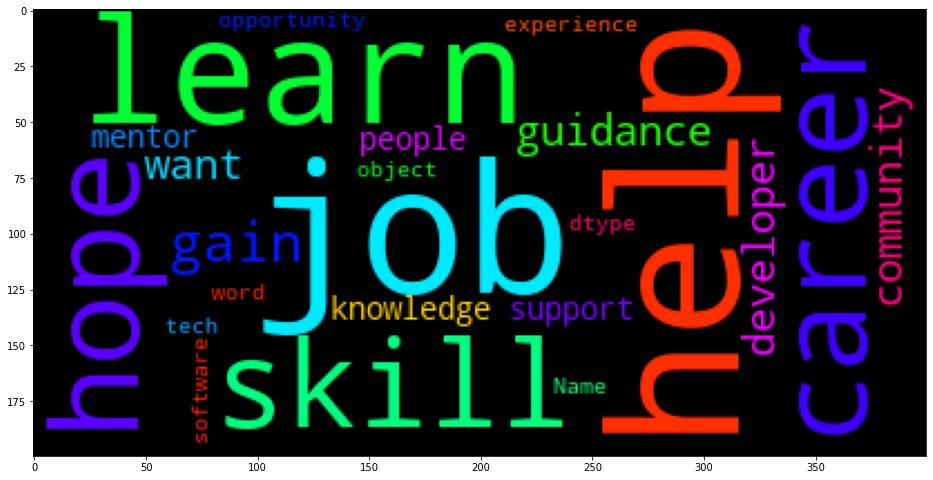

In [16]:
from wordcloud import WordCloud
wc = WordCloud(max_font_size=80,colormap="hsv").generate(df_20_2)
plt.figure(figsize=(16,12))
plt.imshow(wc)
plt.show()

# Display JSON endpoint for DS application to send information for display for front-end

In [17]:
df.to_json(orient='records')

'[{"count":85,"word":"job"},{"count":74,"word":"help"},{"count":65,"word":"learn"},{"count":53,"word":"skill"},{"count":48,"word":"hope"},{"count":44,"word":"career"},{"count":39,"word":"gain"},{"count":38,"word":"guidance"},{"count":33,"word":"developer"},{"count":32,"word":"community"},{"count":32,"word":"want"},{"count":31,"word":"knowledge"},{"count":31,"word":"people"},{"count":30,"word":"support"},{"count":30,"word":"mentor"},{"count":26,"word":"like"},{"count":25,"word":"opportunity"},{"count":24,"word":"tech"},{"count":24,"word":"experience"},{"count":23,"word":"software"},{"count":22,"word":"good"},{"count":22,"word":"industry"},{"count":21,"word":"well"},{"count":21,"word":"new"},{"count":20,"word":"code"},{"count":20,"word":"able"},{"count":19,"word":"life"},{"count":19,"word":"find"},{"count":18,"word":"work"},{"count":17,"word":"mentorship"},{"count":17,"word":"need"},{"count":16,"word":"know"},{"count":16,"word":"direction"},{"count":16,"word":"way"},{"count":15,"word":"l

# Proof of Concept

Using the work done above. Here is a function that could be used in the data.py script. 
 

## nlp pipeline proof of concept (minus mongodb connection)

In [18]:
# This is an example(function) of an endpoint that recieves data from the backend and returns the data in json for visualization!
# This would go into the data.py script and would connect to the mongodb database 

def responses_pipeline(csv_of_responses):
  """
  """
  nlp = spacy.load("en_core_web_sm")
  responses_tokenized = []
 
  df = pd.DataFrame(csv_of_responses.iloc[:,0])
  df.rename(columns = {df.columns[0]:'responses'}, inplace = True)
  df.dropna(inplace=True)


  for x in df['responses']:
    responses_tokenized.append([token.lemma_.lower() for token in nlp(x) if not token.is_stop  
                                and not token.is_punct and (token.pos_ == 'ADJ' 
                                                            or token.pos_ == 'VERB' 
                                                            or token.pos_ == 'NOUN')])
  
  flat_list = list(np.concatenate(clean_responses_tokenized).flat)
  
  df = pd.DataFrame(data=pd.value_counts(flat_list), columns=['count'])
  df['responses'] = df.index
  df.reset_index(drop=True,inplace=True)

  responses_dict = dict(zip(df['responses'], df['count']))
  
  json_object = json.dumps(responses_dict,indent=1)
  print(json_object)
  pass
  # return json_object
  

In [19]:
# data would come from backend endpoint , this backend endpoint would than be connected to by ds endpoint
# in this situation the data is read directly from colab as a placeholder/proof of concept

df=pd.read_csv('responses.csv')

responses_pipeline(df)
# the function would return a key value pair (in descending order) of a topic and
# the number of times that topic appears in all the mentee responses

{
 "job": 85,
 "help": 74,
 "learn": 65,
 "skill": 53,
 "hope": 48,
 "career": 44,
 "gain": 39,
 "guidance": 38,
 "developer": 33,
 "community": 32,
 "want": 32,
 "knowledge": 31,
 "people": 31,
 "support": 30,
 "mentor": 30,
 "like": 26,
 "opportunity": 25,
 "tech": 24,
 "experience": 24,
 "software": 23,
 "good": 22,
 "industry": 22,
 "well": 21,
 "new": 21,
 "code": 20,
 "able": 20,
 "life": 19,
 "find": 19,
 "work": 18,
 "mentorship": 17,
 "need": 17,
 "know": 16,
 "direction": 16,
 "way": 16,
 "look": 15,
 "employment": 15,
 "network": 14,
 "interview": 14,
 "time": 14,
 "build": 14,
 "advice": 13,
 "field": 13,
 "chance": 13,
 "thing": 13,
 "get": 13,
 "love": 12,
 "question": 12,
 "land": 12,
 "grow": 12,
 "programming": 12,
 "start": 11,
 "feel": 10,
 "meet": 10,
 "journey": 10,
 "ask": 10,
 "networking": 10,
 "programmer": 10,
 "understanding": 10,
 "teach": 10,
 "pay": 9,
 "development": 9,
 "connection": 9,
 "develop": 9,
 "web": 9,
 "family": 9,
 "world": 9,
 "go": 8,
 "cha